In [123]:
import os 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

### Combining all the 12 Files into 1 file Dataset


Alternatively we can use the OS library to import the data and convert it into 1 File


In [69]:

All_Data=pd.DataFrame()
files = [file for file in os.listdir('D:\Data\Sales Analysis using Python Pandas\SalesAnalysis\Sales_Data')]
for file in files:
    df=pd.read_csv('D:\Data\Sales Analysis using Python Pandas\SalesAnalysis\Sales_Data\\' + file )
    All_Data = pd.concat([All_Data,df],ignore_index = True)
All_Data.to_csv('All_Data.csv' , index=False)


In [70]:
All_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/2019 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
5,141239,AAA Batteries (4-pack),1,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016"
6,141240,27in 4K Gaming Monitor,1,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001"
7,141241,USB-C Charging Cable,1,11.95,01/05/2019 12:04,"181 6th St, San Francisco, CA 94016"
8,141242,Bose SoundSport Headphones,1,99.99,01/01/2019 10:30,"867 Willow St, Los Angeles, CA 90001"
9,141243,Apple Airpods Headphones,1,150,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016"


In [72]:
All_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186849 entries, 0 to 186848
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


### Question1 : What was the best month for sales and how much money was made that month ? 


#### Adding the coloum Month:

In [73]:
All_Data['Month'] = All_Data['Order Date'].str[0:2]
All_Data.head(100)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1,600,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
95,176649,USB-C Charging Cable,1,11.95,04/09/2019 8:49,"702 11th St, San Francisco, CA 94016",04
96,176650,Lightning Charging Cable,1,14.95,04/12/2019 16:47,"153 River St, Boston, MA 02215",04
97,176651,iPhone,1,700,04/07/2019 13:14,"997 South St, Boston, MA 02215",04
98,176652,LG Washing Machine,1,600,04/09/2019 20:04,"502 14th St, New York City, NY 10001",04


In [75]:
All_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186849 entries, 0 to 186848
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
 6   Month             186305 non-null  object
dtypes: object(7)
memory usage: 10.0+ MB


### Before we move forward we need to Clean the Data

In [79]:
All_Data.isnull().sum()

Order ID            544
Product             544
Quantity Ordered    544
Price Each          544
Order Date          544
Purchase Address    544
Month               544
dtype: int64

In [81]:
Nan_df = All_Data[All_Data.isna().any(axis=1)]
Nan_df.head()
All_Data = All_Data.dropna(how='all')
All_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1,600,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


##### Now We will Change the data type of Month from Object to Int32

#### We're getting an error that "Or" is coming in month column which should be right, to rectify it:

In [91]:

temp_df = All_Data [ All_Data['Order Date'].str[0:2] == 'Or' ]
temp_df.head()
# To remove values with Or:
All_Data = All_Data [ All_Data['Order Date'].str[0:2] != 'Or' ]

##### Now again trying to change the type of month:

In [92]:
All_Data['Month'] = All_Data['Month'].astype('int32')

In [97]:
All_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186848
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 10.6+ MB


#### Setting up a new column called Total_Spent to get the total Amount spent on each order 

In [138]:
### All_Data['Total_Spent'] = All_Data['Price Each'] * All_Data['Quantity Ordered']

#### Looks like we need to change the types of both Price Each and Quatiity Ordered Columns to int32

In [103]:
All_Data['Quantity Ordered'] = All_Data['Quantity Ordered'].astype('int32')
All_Data['Price Each'] = All_Data['Price Each'].astype('float').round().astype('int32')

In [104]:
All_Data.dtypes

Order ID            object
Product             object
Quantity Ordered     int32
Price Each           int32
Order Date          object
Purchase Address    object
Month                int32
dtype: object

#### Now trying again  to create the new Coloumn Total Spent:

In [106]:
All_Data['Total_Spent'] = All_Data['Price Each'] * All_Data['Quantity Ordered']

In [109]:
All_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Spent
0,176558,USB-C Charging Cable,2,12,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,24
1,176559,Bose SoundSport Headphones,1,100,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,100
2,176560,Google Phone,1,600,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600
3,176560,Wired Headphones,1,12,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12
4,176561,Wired Headphones,1,12,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,12


In [131]:
results = All_Data.groupby('Month').sum('Total_Spent')
results

,Quantity Ordered,Price Each,Total_Spent
Month,,,
1,10903,1812089,1822655
2,13449,2189286,2202517
3,17005,2791718,2807722
4,20558,3368294,3391444
5,18667,3135680,3153280
6,15253,2562486,2578373
7,16072,2633019,2648362
8,13448,2230750,2244966
9,13109,2085392,2098053


## To Answer the Question In the Above Column we can clearly see the December had the largest sales with $4614482

#### TO Plot the graph representing it : 

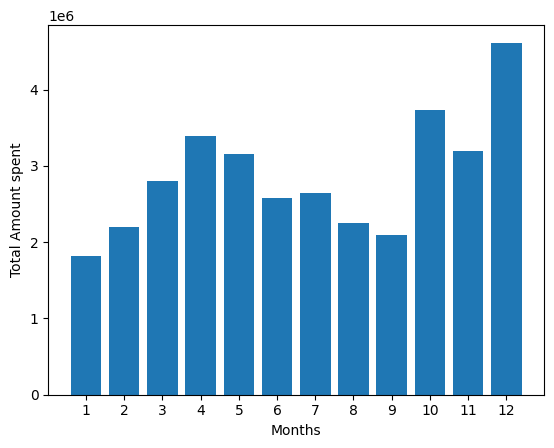

In [137]:
months = range(1,13)
a= plt.bar(months,results['Total_Spent'])
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Total Amount spent')
plt.show()


## What US City had the highest Number of Sales:


In [139]:
All_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Spent
0,176558,USB-C Charging Cable,2,12,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,24
1,176559,Bose SoundSport Headphones,1,100,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,100
2,176560,Google Phone,1,600,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600
3,176560,Wired Headphones,1,12,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12
4,176561,Wired Headphones,1,12,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,12


#### Creating a City Column 

In [160]:
def get_city (address):
    return address.split(',')[1]
def get_state (address):
    return address.split(',')[2].split(' ')[1]
All_Data['City'] = All_Data['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x) )

All_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Spent,City
0,176558,USB-C Charging Cable,2,12,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,24,Dallas TX
1,176559,Bose SoundSport Headphones,1,100,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,100,Boston MA
2,176560,Google Phone,1,600,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600,Los Angeles CA
3,176560,Wired Headphones,1,12,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,Los Angeles CA
4,176561,Wired Headphones,1,12,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,12,Los Angeles CA


In [166]:
high_sales_city = All_Data.groupby('City').sum('Total_Spent' ).sort_values(by= 'Total_Spent' , ascending = False )
high_sales_city

,Quantity Ordered,Price Each,Month,Total_Spent
City,,,,
San Francisco CA,50239,8212968,315520,8264049
Los Angeles CA,33289,5422439,208325,5453807
New York City NY,27932,4636200,175741,4665339
Boston MA,22528,3638084,141112,3662478
Atlanta GA,16602,2780414,104794,2796112
Dallas TX,16730,2753134,104620,2768598
Seattle WA,16553,2733790,104941,2748361
Portland OR,11303,1860901,70621,1871156
Austin TX,11153,1810206,69829,1819987


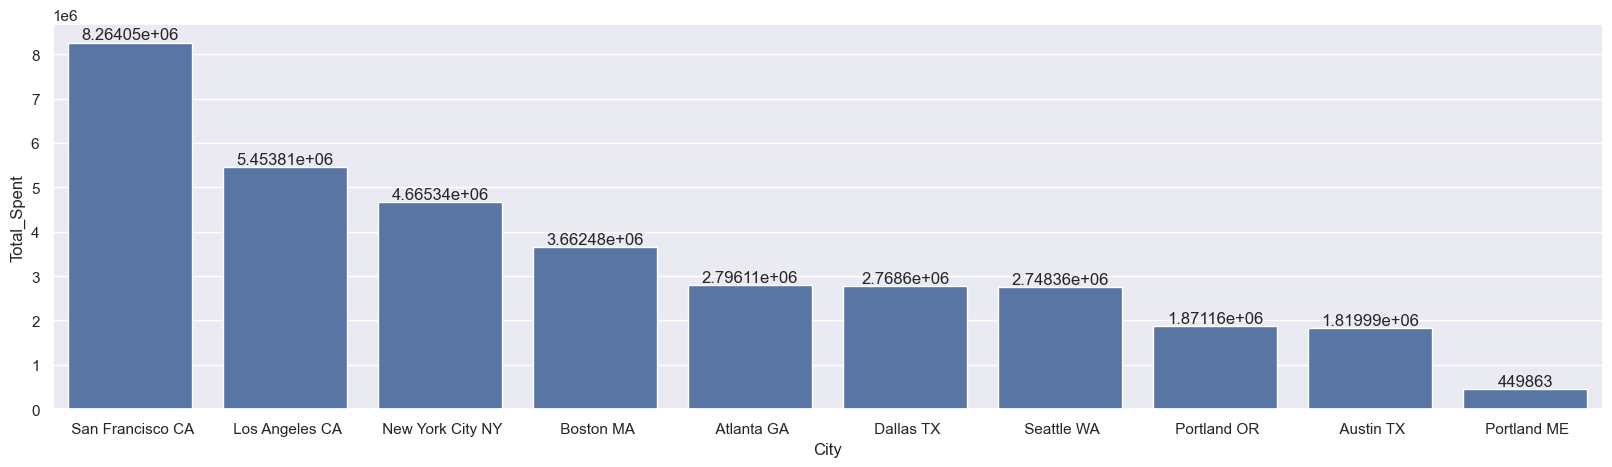

In [172]:
bar_for_high_sales_City = sns.barplot(x='City' , y ='Total_Spent' , data=high_sales_city)
sns.set(rc={'figure.figsize':(20,5)})
for bars in bar_for_high_sales_City.containers:
    bar_for_high_sales_City.bar_label(bars)

### It can be seen that the highest spending City was San Francisco 

## So now what time should we display advertisement to Maximize likelihood of Customer buying products?

In [173]:
All_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Spent,City
0,176558,USB-C Charging Cable,2,12,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,24,Dallas TX
1,176559,Bose SoundSport Headphones,1,100,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,100,Boston MA
2,176560,Google Phone,1,600,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600,Los Angeles CA
3,176560,Wired Headphones,1,12,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,Los Angeles CA
4,176561,Wired Headphones,1,12,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,12,Los Angeles CA


#### We can see that we need to work on the Order Date to figure out the time but first we need to actually extract the time from the Order Date

In [176]:
All_Data['Order Date'] = pd.to_datetime(All_Data['Order Date'] , format = '%m/%d/%Y %H:%M')
All_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Spent,City
0,176558,USB-C Charging Cable,2,12,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,24,Dallas TX
1,176559,Bose SoundSport Headphones,1,100,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,100,Boston MA
2,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600,Los Angeles CA
3,176560,Wired Headphones,1,12,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,Los Angeles CA
4,176561,Wired Headphones,1,12,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,12,Los Angeles CA


In [179]:
All_Data['Hour'] = All_Data['Order Date'].dt.hour
All_Data['Minute'] = All_Data['Order Date'].dt.minute
All_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Spent,City,Hour,Minute
0,176558,USB-C Charging Cable,2,12,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,24,Dallas TX,8,46
1,176559,Bose SoundSport Headphones,1,100,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,100,Boston MA,22,30
2,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600,Los Angeles CA,14,38
3,176560,Wired Headphones,1,12,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,Los Angeles CA,14,38
4,176561,Wired Headphones,1,12,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,12,Los Angeles CA,9,27


#### Now to Find out the highest Hour the Maximun Amount was spent 

In [182]:
max_hour = All_Data.groupby(All_Data['Hour']).sum('Total_Spent').sort_values(by = 'Total_Spent' , ascending= False)
max_hour

,Quantity Ordered,Price Each,Month,Total_Spent,Minute
Hour,,,,,
19,14470,2399017,91389,2413452,381042
12,14202,2300300,89161,2317351,368679
11,14005,2289272,87654,2301124,368952
20,13768,2268610,86375,2282242,354086
18,13802,2208114,86421,2219863,371688
13,13685,2140157,85808,2155902,351045
17,12229,2117137,77454,2129803,323428
14,12362,2072562,77836,2084122,322563
21,12244,2031130,77103,2042451,312062


#### Plotting a bar graph to represent the data 

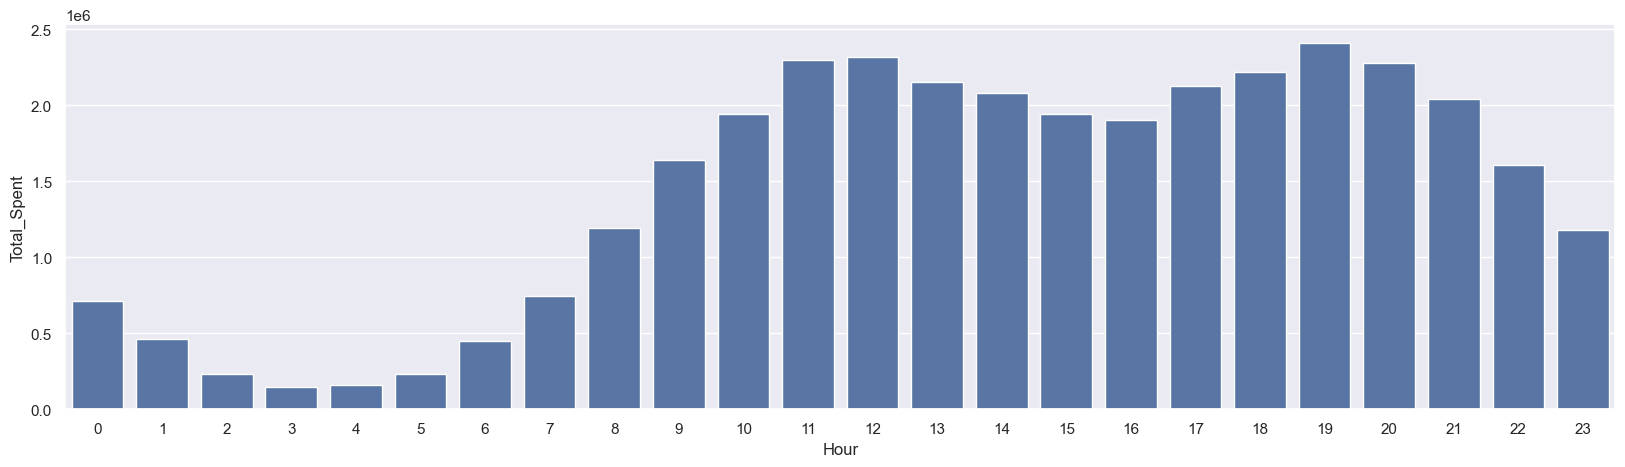

In [190]:
max_hour_bar= sns.barplot(x = 'Hour' , y = 'Total_Spent' , data=max_hour )

### The Maximun Purchases were made at the hour 19 & 12 hence Advertisements should be run around that time

## Question: What products are sold most,Togethor?

In [192]:
All_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Spent,City,Hour,Minute
0,176558,USB-C Charging Cable,2,12,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,24,Dallas TX,8,46
1,176559,Bose SoundSport Headphones,1,100,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,100,Boston MA,22,30
2,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600,Los Angeles CA,14,38
3,176560,Wired Headphones,1,12,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,Los Angeles CA,14,38
4,176561,Wired Headphones,1,12,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,12,Los Angeles CA,9,27


In [203]:
df = All_Data[All_Data['Order ID'].duplicated(keep=False) ]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Spent,City,Hour,Minute
2,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600,Los Angeles CA,14,38
3,176560,Wired Headphones,1,12,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,Los Angeles CA,14,38
17,176574,Google Phone,1,600,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600,Los Angeles CA,19,42
18,176574,USB-C Charging Cable,1,12,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,12,Los Angeles CA,19,42
29,176585,Bose SoundSport Headphones,1,100,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,100,Boston MA,11,31


#### Making a new column called Groupby to add the products which have been sold together


In [208]:
df['Group by'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Group by' ]].drop_duplicates()
df2.head()

C:\Users\shahm\AppData\Local\Temp\ipykernel_17276\3357220551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Group by'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Group by
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [217]:
from itertools import combinations 
from collections import Counter 
count = Counter()
for row in df2['Group by']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
for key, value in count.most_common(20):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') 55
('Lightning Charging Cable', 'Lightning Charging Cable') 54
('Bose SoundSport Headphones', 'Wired Headphones') 53
('AA Batteries (4-pack)', 'Lightning Charging Cable') 51
('AAA Batteries (4-pack)', 'USB-C Chargin

## Hence the most commonly bought items together are the ('iPhone', 'Lightning Charging Cable')

# Another Question is What Product sold the most ?

In [218]:
All_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Spent,City,Hour,Minute
0,176558,USB-C Charging Cable,2,12,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,24,Dallas TX,8,46
1,176559,Bose SoundSport Headphones,1,100,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,100,Boston MA,22,30
2,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600,Los Angeles CA,14,38
3,176560,Wired Headphones,1,12,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,Los Angeles CA,14,38
4,176561,Wired Headphones,1,12,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,12,Los Angeles CA,9,27


In [221]:

max_sold =  All_Data.groupby('Product').sum('Quantity Ordered').sort_values(by = 'Quantity Ordered', ascending= False)
max_sold

,Quantity Ordered,Price Each,Month,Total_Spent,Hour,Minute
Product,,,,,,
AAA Batteries (4-pack),31017,61923,146370,93051,297332,612113
AA Batteries (4-pack),27635,82308,145558,110540,298342,609039
USB-C Charging Cable,23975,262836,154819,287700,314645,647586
Lightning Charging Cable,23217,324870,153092,348255,312529,634442
Wired Headphones,20557,226584,133397,246684,271720,554023
Apple Airpods Headphones,15661,2332350,109477,2349150,223304,455570
Bose SoundSport Headphones,13457,1332500,94113,1345700,192445,392603
27in FHD Monitor,7550,1126050,52558,1132500,107540,219948
iPhone,6849,4789400,47941,4794300,98657,201688


### Hence the Most sold product was the AAA Batteries (4-pack)	